In [1]:
# Download a folder "Mustoe2018_data from Dr. Weeks lab page "https://weeks.chem.unc.edu/publications.html"

In [2]:
filenames = {}
with open('Mustoe2018_data/transcripts.txt','r') as tsf:
    for line in tsf:
        if line[:10]=='transcript':
            continue
        linelist = line.split(',')
        filename = linelist[2]+'-'+linelist[3]+'.shape'
        filenames[linelist[0]]=filename

In [3]:
# number = ["transcript","AUG start position"]

shape_folder = 'Mustoe2018_data/incell_SHAPE/'

AllAUG_position = {}
for transcript_number in [str(x) for x in range(1,len(filenames)+1)]:
    shape_file_name = shape_folder+filenames[transcript_number]
    with open(shape_file_name,'r') as shape_f:
        pre_previous_nt = ''
        previous_nt = ''
        the_nt = ''
        for line in shape_f:
            linelist = line.split()
            if len(linelist)!=4:
                print '____'
                continue
            the_nt = linelist[3]
            if previous_nt=='':
                previous_nt=the_nt
                continue
            if pre_previous_nt=='':
                pre_previous_nt=previous_nt
                previous_nt=the_nt
                continue  
            if pre_previous_nt+previous_nt+the_nt=='AUG':
                aug_position = str(int(linelist[0])-2)
                AllAUG_position[str(len(AllAUG_position)+1)]=[filenames[transcript_number],aug_position]
            pre_previous_nt=previous_nt
            previous_nt=the_nt

In [4]:
Annotated_position= {}
with open('Mustoe2018_data/genes.txt','r') as gf:
    for line in gf:
        if line[:4]=='gene':
            continue
        linelist = line.split(',')
        gene = linelist[0]
        transcript = linelist[5][:-1]
        Tstart = linelist[3]
        Annotated_position[gene] = [filenames[transcript],Tstart]

In [5]:
Annotated_AUG_position = {}
for posi in AllAUG_position.keys():
    for gene in Annotated_position.keys():
        if AllAUG_position[posi][0]==Annotated_position[gene][0]:
            if AllAUG_position[posi][1]==Annotated_position[gene][1]:
                Annotated_AUG_position[gene]=Annotated_position[gene]

In [6]:
Nonannotated_AUG_position = {}
for posi in AllAUG_position.keys():
    flag = 0
    for gene in Annotated_position.keys():
        if AllAUG_position[posi][0]==Annotated_position[gene][0]:
            if AllAUG_position[posi][1]==Annotated_position[gene][1]:
                flag = 1
                break
    if flag == 0:
        Nonannotated_AUG_position[str(len(Nonannotated_AUG_position)+1)]=AllAUG_position[posi]

In [7]:
print len(AllAUG_position)
print len(Annotated_position)
print len(Annotated_AUG_position)
print len(Nonannotated_AUG_position)
print len(Annotated_AUG_position)+len(Nonannotated_AUG_position)


# AllAUG_position < Annotated_position + Nonannotated_AUG_position
# becasue there are non-AUG start codons in AllAUG_position

# Annotated_AUG_position = Annotated_position + Nonannotated_AUG_position

7675
432
365
7310
7675


# Calcuate shape reactivity

In [12]:
import math
import copy
import pickle
import numpy as np
from scipy import stats
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import mlab
import seaborn as sns
%matplotlib inline


mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'

In [13]:
upstream = 100
downstream = 100

In [14]:
outfile_name = 'Shape_annotated.csv'
dictionary_here = copy.deepcopy(Annotated_AUG_position)
#############

ShapeReactivity = {}
shape_folder = 'Mustoe2018_data/incell_SHAPE/'
for key in dictionary_here.keys():
    #print key
    ShapeReactivity[key]=[np.nan for x in range(int(dictionary_here[key][1])-upstream,int(dictionary_here[key][1])+downstream)]
    # assign np.nan to all positions of each key
    
    ReactivityRange = [str(x) for x in range(int(dictionary_here[key][1])-upstream,int(dictionary_here[key][1])+downstream)]                                             
    # a list of positions in a SHAPE file
    
    list_position = 0
    for position in ReactivityRange:
        with open(shape_folder+dictionary_here[key][0]) as shapefile:
            for line in shapefile:
                linelist = line.split()
                if linelist[0] == position:
                    ShapeReactivity[key][list_position]=float(linelist[1])*-1.0  
        list_position+=1  
                
ShapeReactivity_DataFrame = DataFrame.from_dict(ShapeReactivity, orient='index') 
ShapeReactivity_DataFrame.loc['median']=ShapeReactivity_DataFrame.median(axis=0)
ShapeReactivity_DataFrame.to_csv(outfile_name) 

In [15]:
outfile_name = 'Shape_NONannotated.csv'
dictionary_here = copy.deepcopy(Nonannotated_AUG_position)
#############

ShapeReactivity = {}
shape_folder = 'Mustoe2018_data/incell_SHAPE/'
for key in dictionary_here.keys():
    #print key
    ShapeReactivity[key]=[np.nan for x in range(int(dictionary_here[key][1])-upstream,int(dictionary_here[key][1])+downstream)]
    # assign np.nan to all positions of each key
    
    ReactivityRange = [str(x) for x in range(int(dictionary_here[key][1])-upstream,int(dictionary_here[key][1])+downstream)]                                             
    # a list of positions in a SHAPE file
    
    list_position = 0
    for position in ReactivityRange:
        with open(shape_folder+dictionary_here[key][0]) as shapefile:
            for line in shapefile:
                linelist = line.split()
                if linelist[0] == position:
                    ShapeReactivity[key][list_position]=float(linelist[1])*-1.0  
        list_position+=1  
                
ShapeReactivity_DataFrame = DataFrame.from_dict(ShapeReactivity, orient='index') 
ShapeReactivity_DataFrame.loc['median']=ShapeReactivity_DataFrame.median(axis=0)
ShapeReactivity_DataFrame.to_csv(outfile_name) 

# Make plots

In [30]:
Annotated_DataFrame = pd.read_csv('Shape_annotated.csv')
Annotated_DataFrame.set_index('Unnamed: 0', inplace=True)

In [31]:
NONannotated_DataFrame = pd.read_csv('Shape_NONannotated.csv')
NONannotated_DataFrame.set_index('Unnamed: 0', inplace=True)

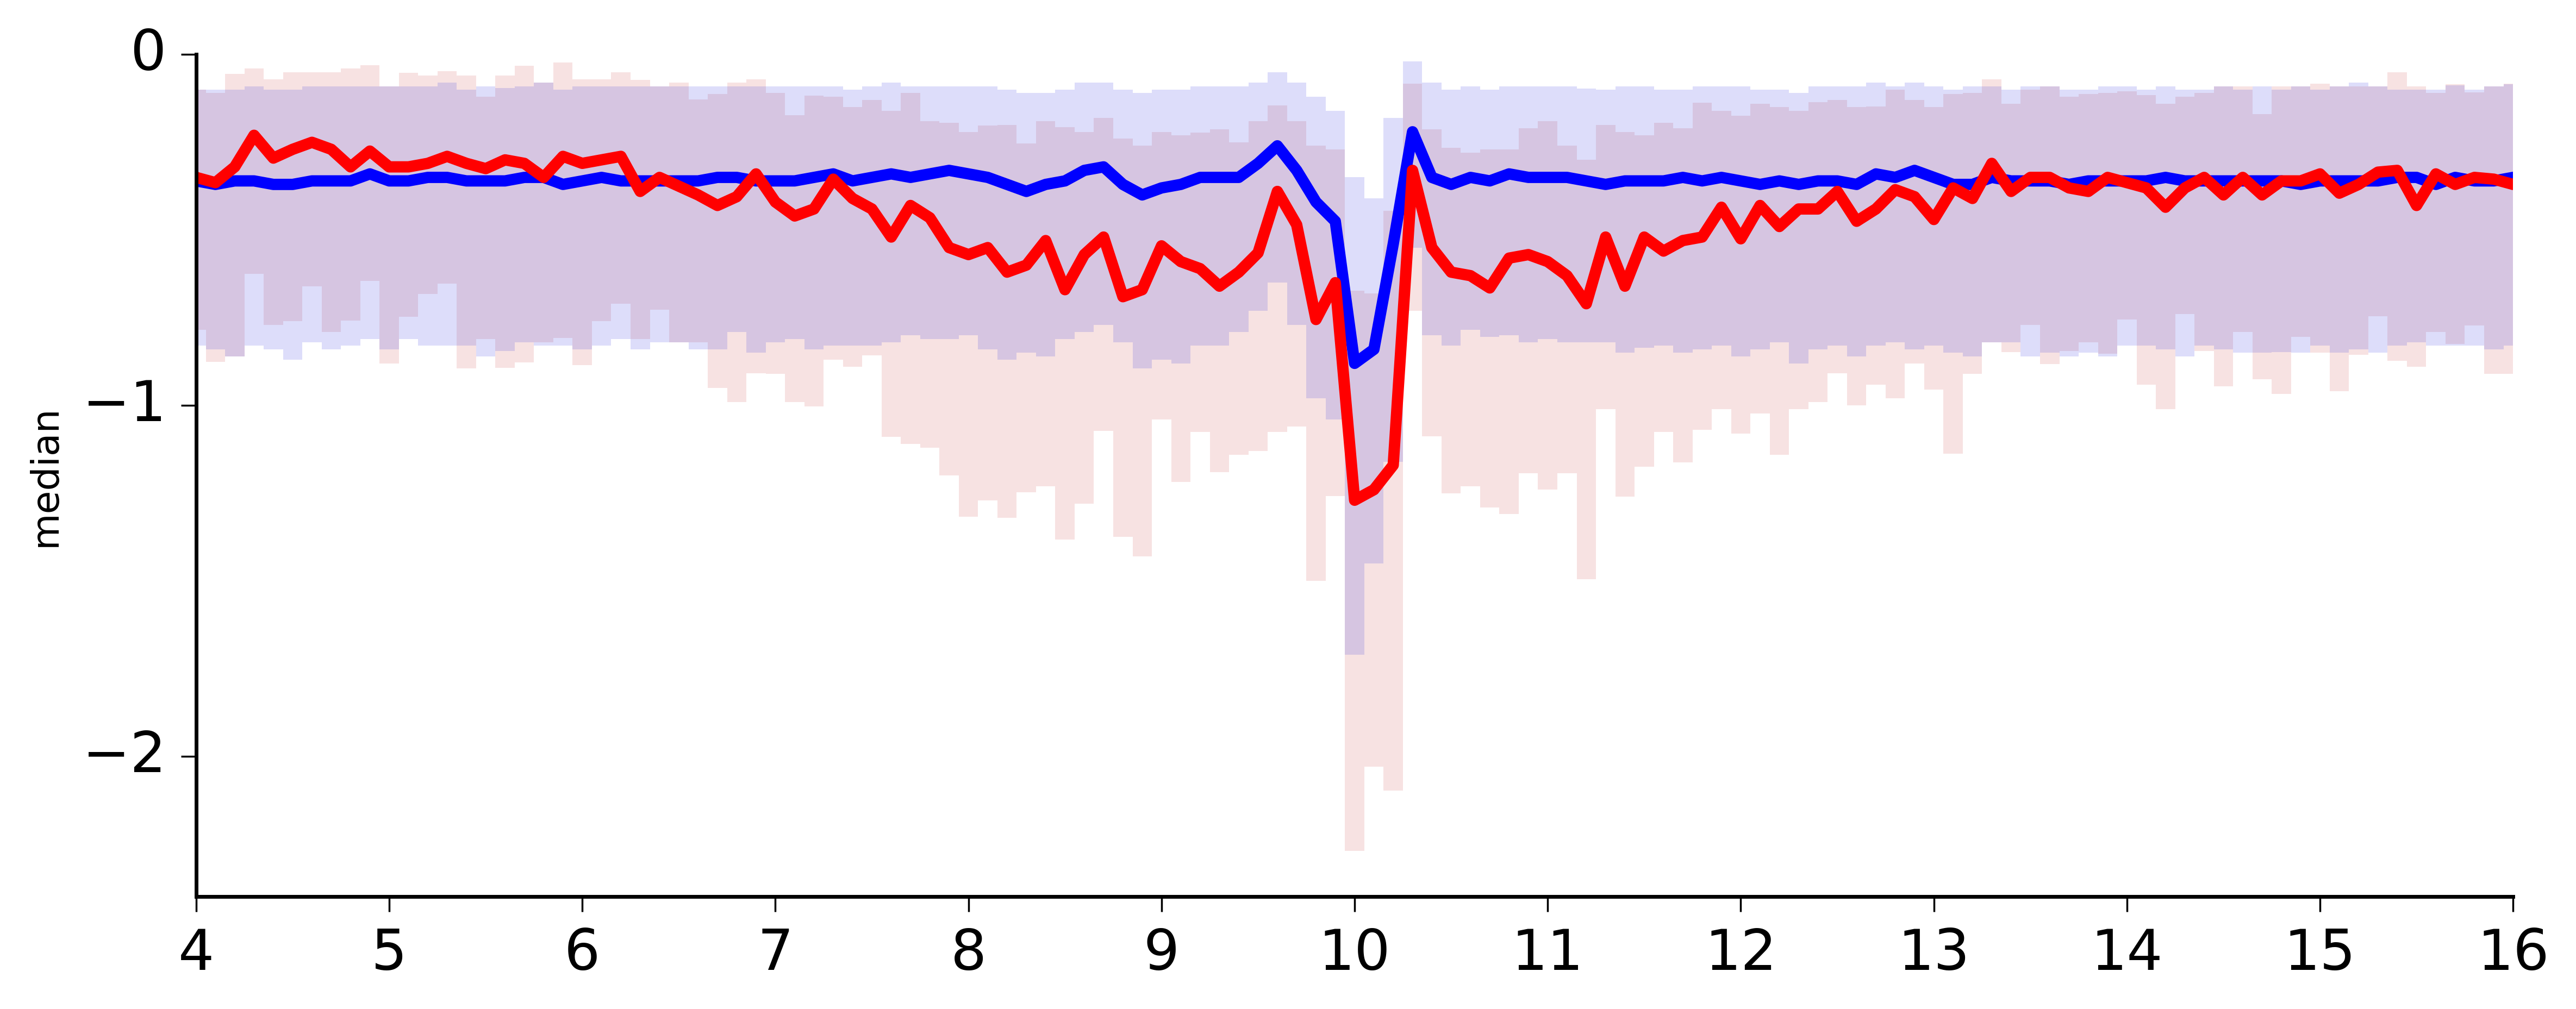

In [32]:
fig, ax = plt.subplots()
fig.set_dpi(500) #####
fig.set_size_inches(11, 4)

data_list = []
for column in Annotated_DataFrame.columns:
    data_list.append(Annotated_DataFrame[column].values)
ax = sns.boxplot(data=data_list,showfliers=False,color = 'lightcoral',
                     width = 1.0, 
                     linewidth=3,
                     capprops={'color': 'black', 'linewidth': 0,"zorder":10},
                     medianprops = {'color': 'black', 'linewidth': 0,"zorder":10}, 
                     boxprops = {'edgecolor': 'black', 'linewidth': 0, 'alpha':0.25},
                     whiskerprops={'color': 'black','linewidth':0, "zorder":10})

data_list = []
for column in NONannotated_DataFrame.columns:
    data_list.append(NONannotated_DataFrame[column].values)
ax = sns.boxplot(data=data_list,showfliers=False,color = 'blue',
                     width = 1.0, 
                     linewidth=3,
                     capprops={'color': 'black', 'linewidth': 0,"zorder":10},
                     medianprops = {'color': 'black', 'linewidth': 0,"zorder":10}, 
                     boxprops = {'edgecolor': 'black', 'linewidth': 0, 'alpha':0.15},
                     whiskerprops={'color': 'black','linewidth':0, "zorder":10})


x=np.arange(len(NONannotated_DataFrame.columns))
y=NONannotated_DataFrame.loc['median']
ax = sns.lineplot(x,y,color='blue',ax=ax,linewidth=3)

x=np.arange(len(Annotated_DataFrame.columns))
y=Annotated_DataFrame.loc['median']
ax = sns.lineplot(x,y,color='red',ax=ax,linewidth=3)

sns.despine()
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.xticks([x*10 for x in range(0,20)])
plt.xlim(40,160)
plt.ylim(-2.4,0)
plt.yticks([-2,-1,0])
plt.tick_params(labelsize=15)
#plt.savefig('SHAPE_ANNOvsNONANNO_AGP.pdf', dpi=500, bbox_inches="tight", pad_inches=0.0)